## Paper Analysis

In [1]:
import json
import io
from collections import defaultdict, Counter

import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

In [2]:
with io.open("summary.json", "r", encoding="utf-8") as f:
    papers = json.load(f)

In [3]:
print("Num papers:", len(papers))

Num papers: 52


In [4]:
dates = list(map(lambda paper: int(paper["date"]), papers))
years = defaultdict(int)
for date in dates:
    years[date] += 1
year_list, count_list = [], []
for year, count in years.items():
    year_list.append(year)
    count_list.append(count)
year_keys = years.keys()

In [5]:
dates_ext = list(map(lambda paper: int(paper["date"]), filter(lambda paper: paper["type"] == "extractive", papers)))
years_ext = defaultdict(int)
for date in dates_ext:
    years_ext[date] += 1
year_ext_list, count_ext_list = [], []
for year in year_keys:
    year_ext_list.append(year)
    count_ext_list.append(years_ext[year])

In [6]:
dates_abs = list(map(lambda paper: int(paper["date"]), filter(lambda paper: paper["type"] == "abstractive", papers)))
years_abs = defaultdict(int)
for date in dates_abs:
    years_abs[date] += 1
    
year_abs_list, count_abs_list = [], []
for year in year_keys:
    year_abs_list.append(year)
    count_abs_list.append(years_abs[year])


In [7]:
for i in range(len(year_list)):
    if year_list[i] != year_ext_list[i]:
        year_ext_list.insert(i, year_list[i])
        count_ext_list.insert(i, 0)
    if year_list[i] != year_abs_list[i]:
        year_abs_list.insert(i, year_list[i])
        count_abs_list.insert(i, 0)
    
for i in range(len(year_list)):
    assert year_list[i] == year_abs_list[i] == year_ext_list[i]
    assert count_list[i] == count_ext_list[i] + count_abs_list[i], i
    
    
data = {
    "year": year_list,
    "total": count_list,
    "extractive": count_ext_list,
    "abstractive": count_abs_list
}
    
df = pd.DataFrame(data, columns=["year", "total", "extractive", "abstractive"])

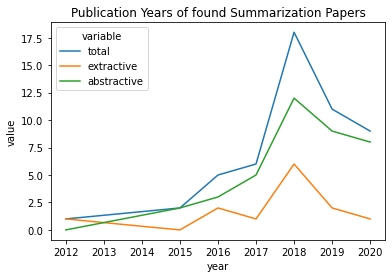

In [8]:
ax = sns.lineplot(x='year', y='value', hue='variable', data=pd.melt(df, ['year']))
_ = ax.set_title("Publication Years of found Summarization Papers")

In [9]:
type_count = Counter()
for paper in papers:
    type_count.update([paper["type"]])
x_list = []
y_list = []
for x, y in type_count.most_common():
    x_list.append(x)
    y_list.append(y)

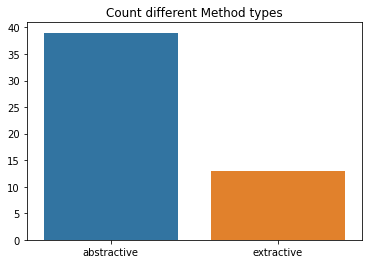

In [10]:
ax = sns.barplot(x=x_list, y=y_list)
_ = ax.set_title("Count different Method types")

In [11]:
datasets = Counter()
for paper in papers:
    datasets.update(paper["dataset"])
x_list = []
y_list = []
for x, y in datasets.most_common():
    x_list.append(x)
    y_list.append(y)

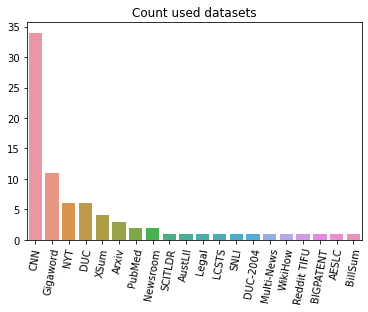

In [12]:
ax = sns.barplot(x=x_list, y=y_list)
_ = ax.set_title("Count used datasets")
_ = ax.set_xticklabels(labels=x_list, rotation=80)

In [13]:
baselines = Counter()
for paper in papers:
    baselines.update(paper["baseline"])
x_list = []
y_list = []
for x, y in baselines.most_common(20):
    x_list.append(x)
    y_list.append(y)

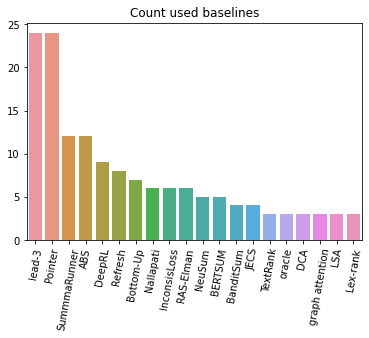

In [14]:
ax = sns.barplot(x=x_list, y=y_list)
_ = ax.set_title("Count used baselines")
_ = ax.set_xticklabels(labels=x_list, rotation=80)

In [15]:
methods = Counter()
for paper in papers:
    methods.update(paper["method"])
x_list = []
y_list = []
for x, y in methods.most_common(15):
    x_list.append(x)
    y_list.append(y)

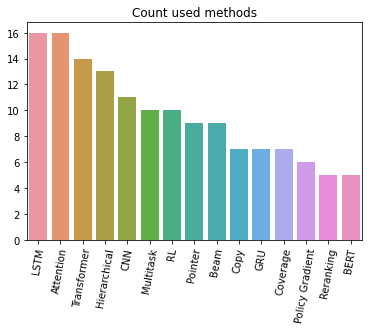

In [16]:
ax = sns.barplot(x=x_list, y=y_list)
_ = ax.set_title("Count used methods")
_ = ax.set_xticklabels(labels=x_list, rotation=80)

In [17]:
import networkx as nx

In [18]:
m_g = nx.Graph()
for paper in papers:
    methods = paper["method"]
    links = [(a,b) for i, a in enumerate(methods) for b in methods[i+1:]]
    for a, b in links:
        m_g.add_edge(a, b)

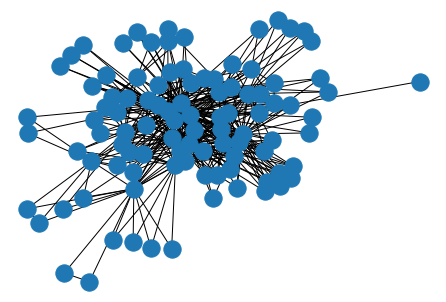

In [24]:
import matplotlib.pyplot as plot
nx.draw_spring(m_g)